# Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from analysis import *
from utils import *

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import silhouette_samples, silhouette_score, classification_report, confusion_matrix

# Data

In [3]:
df = pd.read_csv(
    r'../../data/cleaned/clean3.csv',
    encoding='utf-8',
)

In [4]:
df.head()

price  availability  number_of_products_sold  revenue_generated  \
0  69.808006            55                      802        8661.996792   
1  14.843523            95                      736        7460.900065   
2  11.319683            34                        8        9577.749626   
3  61.163343            68                       83        7766.836426   
4   4.805496            26                      871        2686.505152   

   stock_levels  lead_times  order_quantities  shipping_times  shipping_costs  \
0            58           7                96               4        2.956572   
1            53          30                37               2        9.716575   
2             1          10                88               2        8.054479   
3            23          13                59               6        1.729569   
4             5           3                56               8        3.890548   

   lead_time  ...  product_type   sku  customer_demographics  \
0         29  ...      haircare  SKU0             Non-binary   
1         23  ...      skincare  SKU1                 Female   
2         12  ...      haircare  SKU2                Unknown   
3         24  ...      skincare  SKU3             Non-binary   
4          5  ...      skincare  SKU4             Non-binary   

   shipping_carriers  location inspection_results transportation_modes  \
0          Carrier B    Mumbai            Pending                 Road   
1          Carrier A    Mumbai            Pending                 Road   
2          Carrier B    Mumbai            Pending                  Air   
3          Carrier C   Kolkata               Fail                 Rail   
4          Carrier A     Delhi               Fail                  Air   

    routes shipping_times_category supplier_name  
0  Route B                Standard    Supplier 3  
1  Route B                 Express    Supplier 3  
2  Route C                 Express    Supplier 1  
3  Route A                Standard    Supplier 5  
4  Route A                 Economy    Supplier 1  

[5 rows x 25 columns]

# Load metadata

In [5]:
df = load_metadata(
    df,
    r"../../data/metadata/metadata3.json",
)

# Overview

## Check

In [6]:
print(f"Num of varibles:", df.shape[1])
print(f"Num of rows:", df.shape[0])

Num of varibles: 25
Num of rows: 100


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   price                    100 non-null    float64 
 1   availability             100 non-null    int64   
 2   number_of_products_sold  100 non-null    int64   
 3   revenue_generated        100 non-null    float64 
 4   stock_levels             100 non-null    int64   
 5   lead_times               100 non-null    int64   
 6   order_quantities         100 non-null    int64   
 7   shipping_times           100 non-null    int64   
 8   shipping_costs           100 non-null    float64 
 9   lead_time                100 non-null    int64   
 10  production_volumes       100 non-null    int64   
 11  manufacturing_lead_time  100 non-null    int64   
 12  manufacturing_costs      100 non-null    float64 
 13  defect_rates             100 non-null    float64 
 14  costs      

In [8]:
df.isnull().sum()

price                      0
availability               0
number_of_products_sold    0
revenue_generated          0
stock_levels               0
lead_times                 0
order_quantities           0
shipping_times             0
shipping_costs             0
lead_time                  0
production_volumes         0
manufacturing_lead_time    0
manufacturing_costs        0
defect_rates               0
costs                      0
product_type               0
sku                        0
customer_demographics      0
shipping_carriers          0
location                   0
inspection_results         0
transportation_modes       0
routes                     0
shipping_times_category    0
supplier_name              0
dtype: int64

## Varibles and target

In [9]:
target = ['supplier_name']
variablies = [col for col in df.columns if col not in target]

print(target)
print(variablies)

['supplier_name']
['price', 'availability', 'number_of_products_sold', 'revenue_generated', 'stock_levels', 'lead_times', 'order_quantities', 'shipping_times', 'shipping_costs', 'lead_time', 'production_volumes', 'manufacturing_lead_time', 'manufacturing_costs', 'defect_rates', 'costs', 'product_type', 'sku', 'customer_demographics', 'shipping_carriers', 'location', 'inspection_results', 'transportation_modes', 'routes', 'shipping_times_category']


# Grouping Varibles by their respective data types

In [10]:
numerical_cols, categorical_cols, _ = group_columns_by_type(df, display_info=True)

Total numeric columns: 15
Numeric columns: ['price', 'availability', 'number_of_products_sold', 'revenue_generated', 'stock_levels', 'lead_times', 'order_quantities', 'shipping_times', 'shipping_costs', 'lead_time', 'production_volumes', 'manufacturing_lead_time', 'manufacturing_costs', 'defect_rates', 'costs']

Total categorical columns: 10
Categorical columns: ['product_type', 'sku', 'customer_demographics', 'shipping_carriers', 'location', 'inspection_results', 'transportation_modes', 'routes', 'shipping_times_category', 'supplier_name']



# Multivariate

In [11]:
df_numerical = df[numerical_cols].copy()
df_categorical = df[categorical_cols].copy()

In [12]:
encoder = OrdinalEncoder(
    categories=[["Supplier 1", "Supplier 2", "Supplier 3", "Supplier 4", "Supplier 5"]]
)
df["supplier_name"] = encoder.fit_transform(df[["supplier_name"]])
df["supplier_name"].unique()

array([2., 0., 4., 3., 1.])

## Correlation

In [55]:
df[numerical_cols].corr().round(2)

price  availability  number_of_products_sold  \
price                     1.00          0.02                     0.01   
availability              0.02          1.00                     0.09   
number_of_products_sold   0.01          0.09                     1.00   
revenue_generated         0.04         -0.08                    -0.00   
stock_levels              0.08         -0.03                     0.02   
lead_times                0.04          0.17                    -0.05   
order_quantities          0.10          0.14                     0.02   
shipping_times            0.07         -0.05                     0.09   
shipping_costs            0.06         -0.04                     0.04   
lead_time                 0.15         -0.16                     0.04   
production_volumes       -0.12          0.05                     0.19   
manufacturing_lead_time  -0.30          0.07                    -0.05   
manufacturing_costs      -0.18          0.13                     0.03   
defect_rates             -0.15          0.04                    -0.08   
costs                     0.09         -0.03                    -0.04   

                         revenue_generated  stock_levels  lead_times  \
price                                 0.04          0.08        0.04   
availability                         -0.08         -0.03        0.17   
number_of_products_sold              -0.00          0.02       -0.05   
revenue_generated                     1.00         -0.16       -0.06   
stock_levels                         -0.16          1.00        0.07   
lead_times                           -0.06          0.07        1.00   
order_quantities                      0.03         -0.11        0.11   
shipping_times                       -0.11         -0.09       -0.05   
shipping_costs                       -0.07          0.07       -0.12   
lead_time                            -0.01          0.07       -0.00   
production_volumes                   -0.04          0.04       -0.15   
manufacturing_lead_time               0.01         -0.05        0.00   
manufacturing_costs                  -0.21          0.03       -0.02   
defect_rates                         -0.13         -0.15        0.02   
costs                                 0.03         -0.01        0.24   

                         order_quantities  shipping_times  shipping_costs  \
price                                0.10            0.07            0.06   
availability                         0.14           -0.05           -0.04   
number_of_products_sold              0.02            0.09            0.04   
revenue_generated                    0.03           -0.11           -0.07   
stock_levels                        -0.11           -0.09            0.07   
lead_times                           0.11           -0.05           -0.12   
order_quantities                     1.00           -0.00            0.00   
shipping_times                      -0.00            1.00            0.05   
shipping_costs                       0.00            0.05            1.00   
lead_time                           -0.09           -0.02            0.03   
production_volumes                  -0.09           -0.06           -0.10   
manufacturing_lead_time              0.11           -0.02           -0.01   
manufacturing_costs                 -0.03            0.03            0.01   
defect_rates                         0.02           -0.04            0.08   
costs                                0.17           -0.05            0.05   

                         lead_time  production_volumes  \
price                         0.15               -0.12   
availability                 -0.16                0.05   
number_of_products_sold       0.04                0.19   
revenue_generated            -0.01               -0.04   
stock_levels                  0.07                0.04   
lead_times                   -0.00               -0.15   
order_quantities             -0.09               -0.09   
shippi

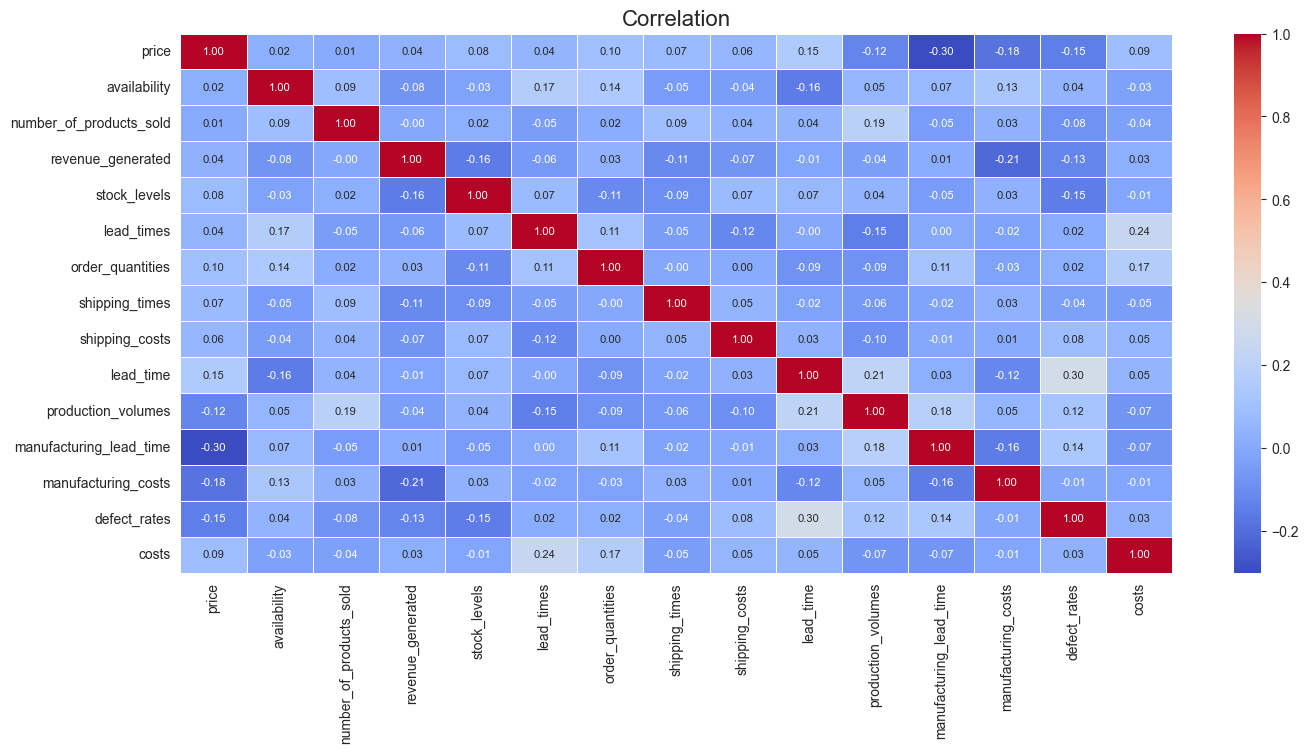

In [63]:
plt.figure(figsize=(16, 7))
sns.heatmap(
    df[numerical_cols].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5,
    annot_kws={"size": 8},
)
plt.title("Correlation", fontsize=16)
plt.show()

## Visualization and dimensionality reduction

### PCA

In [13]:
# Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numerical)

#### Selection `n_components`

In [14]:
n_components_pca_full = min(df_numerical.shape[0], df_numerical.shape[1])

In [15]:
pca_full = PCA(n_components=n_components_pca_full, random_state=42)
X_pca_full = pca_full.fit_transform(X_scaled)

In [16]:
explained_var = pca_full.explained_variance_ratio_
eigenvalues = pca_full.explained_variance_
cum_var = np.cumsum(explained_var)

summary_df = pd.DataFrame(
        {
            "eigenvalue": eigenvalues,
            "variance_%": explained_var * 100,
            "variance_(cumulative)_%": cum_var * 100,
        }
    )

summary_df.index = [f"PC{i+1}" for i in range(len(explained_var))]
summary_df.round(2)

eigenvalue  variance_%  variance_(cumulative)_%
PC1         1.68       11.07                    11.07
PC2         1.49        9.85                    20.92
PC3         1.48        9.75                    30.67
PC4         1.38        9.11                    39.78
PC5         1.21        8.00                    47.77
PC6         1.20        7.89                    55.67
PC7         1.04        6.88                    62.55
PC8         0.99        6.56                    69.11
PC9         0.94        6.21                    75.32
PC10        0.83        5.47                    80.79
PC11        0.71        4.68                    85.47
PC12        0.66        4.38                    89.84
PC13        0.57        3.76                    93.60
PC14        0.53        3.48                    97.08
PC15        0.44        2.92                   100.00

In [17]:
plot_pca_contributions(pca_full, 0.95)

#### Main

In [18]:
pca = PCA(n_components=13, random_state=42)
X_pca = pca.fit(X_scaled)

In [19]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings

array([[-5.44959167e-01, -3.91226341e-01, -2.04777675e-01,
        -2.32361210e-01, -1.72039626e-01,  2.75405594e-01,
        -3.94632748e-02,  1.12273814e-01, -3.74049423e-01,
         1.60277186e-01, -1.49660764e-01, -7.85893170e-02,
        -1.37794648e-01],
       [-3.38233190e-02,  5.82607365e-01,  1.80394110e-01,
        -1.90287235e-01, -2.71351130e-01,  2.34258747e-01,
         5.33776195e-02,  8.59324785e-03, -4.88988025e-01,
        -2.38647496e-01, -3.03334747e-01, -8.92178837e-03,
         1.54339852e-01],
       [ 1.25170694e-01, -9.89961263e-02,  2.31011375e-01,
        -1.35689702e-01, -4.21952455e-01,  6.03630577e-01,
         6.29523232e-02, -1.57358335e-01,  2.80609349e-01,
        -3.00163653e-01,  3.78228474e-01, -5.41594516e-02,
         5.35261684e-02],
       [-1.44724813e-01, -1.12643125e-01, -3.47492650e-01,
         6.03200852e-01, -2.66417977e-01,  6.16108851e-02,
        -5.10201144e-02, -3.12325028e-01,  3.72820224e-02,
        -1.98076315e-01, -2.08742898e

In [20]:
get_pca_contribution_table(
    pca,
    variable_names=numerical_cols,
    percent=True
)

PC1      PC2      PC3      PC4      PC5      PC6  \
price                    17.71 %  10.25 %   2.84 %   3.91 %   2.44 %   6.34 %   
availability              0.07 %  22.74 %    2.2 %   2.62 %   6.08 %   4.59 %   
number_of_products_sold   0.93 %   0.66 %   3.61 %   1.33 %  14.69 %  30.46 %   
revenue_generated         1.25 %   0.85 %   8.17 %  26.37 %   5.86 %   0.32 %   
stock_levels              0.34 %   4.18 %   3.25 %  12.66 %   9.19 %  12.49 %   
lead_times                7.12 %  13.21 %   3.72 %   8.73 %   3.01 %   3.74 %   
order_quantities          3.79 %   15.0 %   5.12 %   0.01 %   0.03 %  13.46 %   
shipping_times            0.24 %   1.17 %   2.61 %   0.03 %  11.17 %  22.74 %   
shipping_costs            0.03 %   3.25 %    0.0 %    4.5 %  17.44 %   3.29 %   
lead_time                 6.36 %   11.1 %  16.66 %  13.22 %   0.77 %   0.16 %   
production_volumes       24.45 %    0.2 %    0.0 %   1.43 %  16.51 %   1.95 %   
manufacturing_lead_time  15.57 %   9.08 %   5.03 %   3.31 %    0.0 %   0.01 %   
manufacturing_costs       0.42 %   4.15 %  25.34 %   6.01 %   1.83 %   0.39 %   
defect_rates             14.06 %   1.51 %  11.23 %   8.18 %  10.89 %   0.02 %   
costs                     7.65 %   2.64 %  10.21 %   7.67 %   0.09 %   0.05 %   
Total                    100.0 %  100.0 %  100.0 %  100.0 %  100.0 %  100.0 %   

                             PC7      PC8      PC9     PC10     PC11     PC12  \
price                     0.15 %   1.27 %  14.87 %    3.1 %   3.16 %   0.93 %   
availability              0.27 %   0.01 %  25.41 %   6.87 %  12.99 %   0.01 %   
number_of_products_sold   0.38 %   2.49 %   8.37 %  10.87 %  20.19 %   0.44 %   
revenue_generated         0.25 %   9.82 %   0.15 %   4.73 %   6.15 %  31.13 %   
stock_levels             21.72 %   2.67 %   0.65 %    1.8 %   0.01 %   8.88 %   
lead_times                0.91 %   8.32 %   3.44 %  15.78 %   1.11 %   3.38 %   
order_quantities           4.3 %   0.76 %   0.16 %  35.13 %  10.55 %   4.93 %   
shipping_times            2.31 %  30.74 %    8.3 %   0.05 %   9.23 %   5.56 %   
shipping_costs           35.17 %  12.35 %   0.17 %   7.73 %   3.19 %   0.31 %   
lead_time                 3.36 %   0.17 %   0.31 %   0.14 %   0.32 %  11.79 %   
production_volumes        0.53 %   0.69 %   0.96 %    6.3 %  15.07 %   3.09 %   
manufacturing_lead_time  18.77 %   8.84 %   2.16 %   0.27 %   2.06 %   0.42 %   
manufacturing_costs        7.7 %  11.26 %   0.51 %   4.04 %   1.05 %  20.66 %   
defect_rates              3.66 %    0.8 %   5.41 %    2.7 %   2.69 %   0.19 %   
costs                     0.52 %   9.83 %  29.11 %    0.5 %  12.23 %   8.28 %   
Total                    100.0 %  100.0 %  100.0 %  100.0 %  100.0 %  100.0 %   

                            PC13  
price                     3.34 %  
availability              4.19 %  
number_of_products_sold    0.5 %  
revenue_generated         2.53 %  
stock_levels             21.32 %  
lead_times               14.75 %  
order_quantities           0.1 %  
shipping_times            4.21 %  
shipping_costs            7.54 %  
lead_time                 4.13 %  
production_volumes        2.61 %  
manufacturing_lead_time   4.26 %  
manufacturing_costs       5.26 %  
defect_rates             19.84 %  
costs                     5.42 %  
Total                    100.0 %

#### Report

---

**PC1**: Production & Cost Efficiency Component (11.07%)

**Biến chi phối**:
- `production_volumes` 24.45%
- `manufacturing_lead_time` 15.57%
- `defect_rates` 14.06%
- `costs` 7.65%
- `lead_times` 7.12%

**Diễn giải**:
- Đại diện cho hiệu suất sản xuất tổng thể: khối lượng, tốc độ, lỗi và chi phí.
- Các nhà cung cấp có điểm PC1 cao nghĩa là có **năng lực sản xuất lớn, ít lỗi, chi phí hợp lý**.

---

**PC2**: Operational & Availability Dynamics (9.85%)

**Biến chi phối**:
- `availability` 22.74%
- `order_quantities` 15.0%
- `lead_times` 13.21%
- `lead_time` 11.1%

**Diễn giải**:
- Biểu diễn mức độ sẵn hàng và linh hoạt trong đáp ứng đơn hàng.
- Điểm cao ở PC2 nghĩa là nhà cung cấp **phản ứng nhanh, hàng có sẵn, tốc độ dẫn đầu**.

---

**PC3**: Cost & Manufacturing Tradeoff (9.75%)

**Biến chi phối**:
- `manufacturing_costs` 25.34%
- `lead_time` 16.66%
- `defect_rates` 11.23%
- `costs` 10.21%

**Diễn giải**:
- Phản ánh tác động giữa chi phí sản xuất, lỗi và thời gian sản xuất.
- PC3 cao nghĩa là **chi phí cao nhưng có thể chất lượng và năng lực tốt**.

---

**PC4**: Revenue & Quality Component (9.11%)

**Biến chi phối**:
- `revenue_generated` 26.37%
- `stock_levels` 12.66%
- `lead_time` 13.22%
- `defect_rates` 8.18%

**Diễn giải**:
- Diễn tả khả năng sinh lợi gắn với chất lượng sản phẩm và tồn kho tối ưu.
- Điểm cao nghĩa là **doanh thu tốt, chất lượng sản phẩm cao, quản lý tồn kho hiệu quả**.

---

**PC5**: Price & Cost Ratio (8.00%)

**Biến chi phối**:
- `shipping_costs` 17.44%
- `production_volumes` 16.51%
- `defect_rates` 10.89%

**Diễn giải**:
- Phản ánh hiệu suất giá – chi phí vận hành.
- Điểm cao nghĩa là **giá bán hợp lý, chi phí thấp, năng suất cao**.

---

**PC6**: Sales & Supply Chain Responsiveness (7.89%)

**Biến chi phối**:
- `number_of_products_sold` 30.46%
- `shipping_times` 22.74%
- `stock_levels` 12.49%

**Diễn giải**:
- Thể hiện sự kết nối giữa bán hàng và hiệu quả vận chuyển.
- Điểm cao nghĩa là **bán nhanh, giao hàng nhanh, tồn kho hợp lý**.

---

**Các PC phụ (PC7–PC10)**:

- **PC7**: Chiến lược chi phí vận chuyển (`Shipping cost strategy`)
- **PC8**: Tối ưu hóa thời gian vận chuyển (`Shipping time optimization`)
- **PC9**: Chi phí vận tải và đơn hàng (`Transportation cost and orders`)
- **PC10**: Đáp ứng đơn hàng và dự báo nhu cầu (`Order fulfillment and demand forecasting`)

---

### MCA

In [21]:
df_categorical.columns

Index(['product_type', 'sku', 'customer_demographics', 'shipping_carriers',
       'location', 'inspection_results', 'transportation_modes', 'routes',
       'shipping_times_category', 'supplier_name'],
      dtype='object')

In [22]:
df_categorical_mca = df_categorical.drop(columns=['supplier_name']).copy()

#### Select `n_components`

In [23]:
n_components_mca_full = min(df_categorical_mca.shape[0], df_categorical_mca.shape[1])

mca_full = MCA(
    n_components=n_components_mca_full, 
    n_iter=10,
    copy=True,
    check_input=True,
    engine="sklearn",
    random_state=42,
    one_hot=True
).fit(df_categorical)

In [24]:
mca_full.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.292         2.37%                      2.37%
1              0.284         2.31%                      4.68%
2              0.274         2.23%                      6.91%
3              0.256         2.08%                      9.00%
4              0.249         2.02%                     11.02%
5              0.236         1.92%                     12.94%
6              0.232         1.89%                     14.83%
7              0.220         1.79%                     16.62%
8              0.213         1.73%                     18.35%

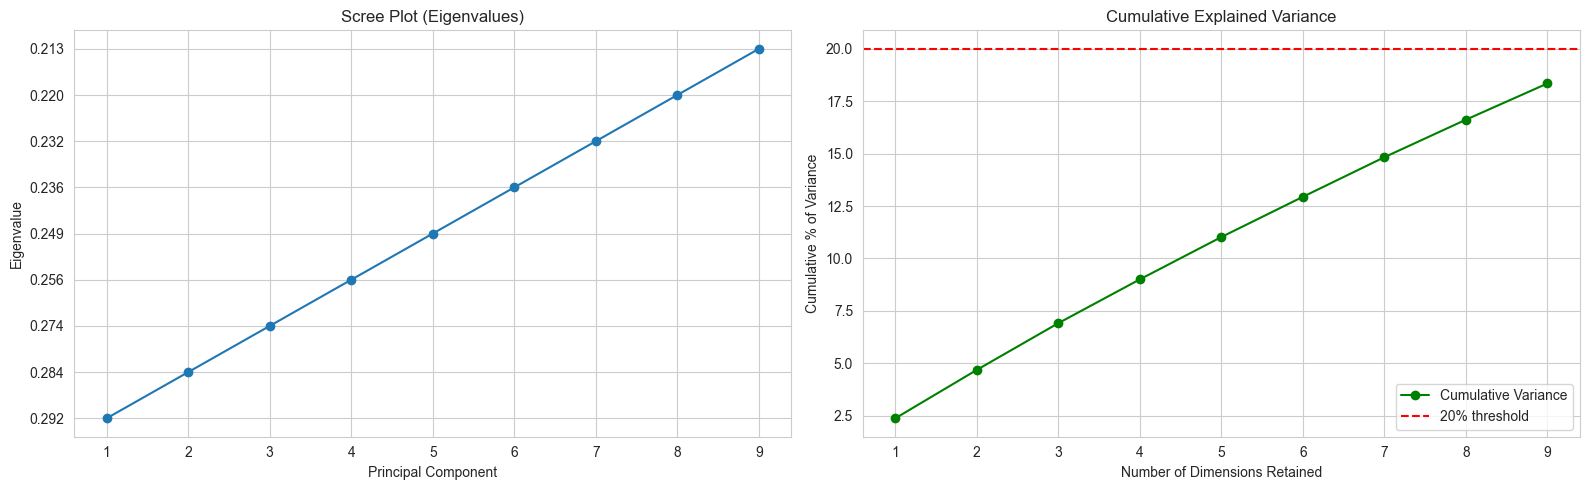

In [25]:
plot_mca_contributions(mca_full, 0.20)

#### Main

In [26]:
mca = MCA(
        n_components=n_components_mca_full ,
        n_iter=10,
        copy=True,
        check_input=True,
        engine="sklearn",
        random_state=42,
        one_hot=True,
    )
mca = mca.fit(df_categorical_mca)

In [27]:
mca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.309         2.34%                      2.34%
1              0.293         2.22%                      4.55%
2              0.288         2.17%                      6.73%
3              0.271         2.05%                      8.78%
4              0.259         1.96%                     10.74%
5              0.255         1.93%                     12.67%
6              0.239         1.81%                     14.48%
7              0.237         1.79%                     16.27%
8              0.229         1.73%                     18.00%

In [28]:
mca.plot(
    df_categorical_mca,
    x_component=0,
    y_component=1,
    show_column_markers=True,
    show_row_markers=False,
    show_column_labels=False,
    show_row_labels=False,
)

alt.LayerChart(...)

In [29]:
mca.column_contributions_.head()

0         1         2         3         4  \
product_type__cosmetics  0.047294  0.029633  0.001103  0.007390  0.019146   
product_type__haircare   0.058514  0.007561  0.006548  0.021967  0.001264   
product_type__skincare   0.002274  0.047940  0.010278  0.004535  0.006206   
sku__SKU0                0.008385  0.001915  0.002394  0.000152  0.000401   
sku__SKU1                0.000491  0.008783  0.001411  0.000284  0.001489   

                                5         6         7         8  
product_type__cosmetics  0.012419  0.029045  0.023625  0.009538  
product_type__haircare   0.020777  0.042330  0.009963  0.013695  
product_type__skincare   0.001853  0.002734  0.046633  0.034831  
sku__SKU0                0.003948  0.003403  0.002370  0.001303  
sku__SKU1                0.000231  0.034673  0.002208  0.000834

In [30]:
get_mca_contribution_table(mca, percent=True)

Dim1     Dim2     Dim3     Dim4     Dim5     Dim6  \
product_type             10.81 %   8.51 %   1.79 %   3.39 %   2.66 %    3.5 %   
sku                      35.97 %  37.91 %  38.64 %  40.93 %  42.87 %  43.62 %   
customer_demographics     9.16 %   9.43 %    8.5 %  11.98 %   6.38 %  11.45 %   
shipping_carriers        13.97 %   5.99 %   5.54 %   1.04 %   8.23 %   6.44 %   
location                  9.49 %   5.47 %   8.51 %  10.95 %  11.63 %  17.31 %   
inspection_results        7.94 %   6.88 %   4.68 %   8.08 %   3.93 %   5.29 %   
transportation_modes      8.27 %  11.48 %  12.01 %   8.56 %  11.83 %   5.22 %   
routes                    0.83 %   2.78 %  11.54 %    5.6 %  12.01 %    4.0 %   
shipping_times_category   3.56 %  11.54 %   8.79 %   9.48 %   0.46 %   3.15 %   
Total                    100.0 %  100.0 %  100.0 %  100.0 %  100.0 %  100.0 %   

                            Dim7     Dim8     Dim9  
product_type              7.41 %   8.02 %   5.81 %  
sku                       46.4 %  46.86 %  48.61 %  
customer_demographics     3.69 %   2.18 %  12.45 %  
shipping_carriers         7.68 %   0.19 %   1.02 %  
location                 10.92 %  22.06 %  15.61 %  
inspection_results       12.55 %   1.85 %   0.26 %  
transportation_modes      1.48 %  14.67 %   9.69 %  
routes                    7.87 %   3.91 %   2.54 %  
shipping_times_category    2.0 %   0.26 %   4.01 %  
Total                    100.0 %  100.0 %  100.0 %

#### Report

**Dim1**: Product–Distribution Interaction Component (10.81%)

**Biến chi phối**:
* sku 35.97%
* shipping_carriers 13.97%
* location 9.49%
* product_type 10.81%

**Diễn giải**:
* Thành phần này thể hiện mối liên kết giữa danh mục sản phẩm, hãng vận chuyển và khu vực phân phối.
* Các đối tượng có điểm Dim1 cao đại diện cho sản phẩm **phân phối rộng, liên kết mạnh với các kênh vận chuyển đa dạng**.

---

**Dim2**: Transportation & Delivery Efficiency Component (8.51%)

**Biến chi phối**:
* sku 37.91%
* transportation_modes 11.48%
* shipping_times_category 11.54%
* customer_demographics 9.43%
* 
**Diễn giải**:
* Thành phần này phản ánh hiệu quả vận tải và tốc độ giao hàng theo từng loại sản phẩm (SKU).
* Điểm Dim2 cao biểu thị đơn vị có **hệ thống vận chuyển linh hoạt và thời gian giao hàng tối ưu**.

---

**Dim3**: Routing & Logistics Optimization Component (1.79%)

**Biến chi phối**:
* sku 38.64%
* transportation_modes 12.01%
* routes 11.54%
* shipping_times_category 8.79%

**Diễn giải**:
* Thành phần này mô tả sự phối hợp giữa loại hàng hóa, tuyến đường và phương thức vận tải.
* Điểm Dim3 cao phản ánh khả năng **tối ưu hóa tuyến và phương tiện để nâng cao hiệu suất giao hàng**.

---

**Dim4**: Market–Customer Alignment Component (3.39%)

**Biến chi phối**:
* sku 40.93%
* customer_demographics 11.98%
* location 10.95%
* inspection_results 8.08%

**Diễn giải**:
* Đại diện cho mối liên hệ giữa đặc điểm khách hàng, vị trí địa lý và dòng sản phẩm.
* Điểm Dim4 cao cho thấy sản phẩm **phù hợp đặc thù khách hàng và khu vực mục tiêu**.

---

**Dim5**: Transportation Route Strategy Component (2.66%)

**Biến chi phối**:
* sku 42.87%
* routes 12.01%
* transportation_modes 11.83%
* location 11.63%

**Diễn giải**:
* Thành phần này nhấn mạnh chiến lược lựa chọn tuyến đường và phương tiện vận tải cho từng SKU.
* Điểm Dim5 cao phản ánh sự **đa dạng chiến lược vận chuyển và khả năng thích ứng theo khu vực**.

---

**Dim6**: Product–Regional Distribution Component (3.50%)

**Biến chi phối**:
* sku 43.62%
* location 17.31%
* customer_demographics 11.45%

**Diễn giải**:
* Phản ánh mối tương quan giữa sản phẩm và khu vực phân phối, cùng ảnh hưởng nhân khẩu học.
* Điểm Dim6 cao đại diện cho danh mục sản phẩm được **phân bổ theo từng vùng tiêu thụ rõ rệt**.

---

**Dim7**: Quality & Inspection Component (7.41%)

**Biến chi phối**:
* sku 46.40%
* inspection_results 12.55%
* product_type 7.41%

**Diễn giải**:
* Thành phần này thể hiện chất lượng kiểm định và độ ổn định sản phẩm theo danh mục SKU.
* Điểm Dim7 cao biểu thị sản phẩm có **kiểm định tốt, độ tin cậy và chất lượng cao**.

---

**Dim8**: Regional SKU Segmentation Component (8.02%)

**Biến chi phối**:
* sku 46.86%
* location 22.06%
* transportation_modes 14.67%

**Diễn giải**:
* Đại diện cho phân khúc sản phẩm theo vùng địa lý, có liên quan đến phương thức vận chuyển.
* Điểm Dim8 cao cho thấy **phân bổ sản phẩm đặc trưng theo vùng, được hỗ trợ bởi kênh vận chuyển phù hợp**.

---

**Dim9**: Customer–Geographic Preference Component (5.81%)

**Biến chi phối**:
* sku 48.61%
* customer_demographics 12.45%
* location 15.61%

**Diễn giải**:
* Thành phần này mô tả mối liên hệ giữa nhân khẩu học khách hàng, vùng tiêu thụ và danh mục sản phẩm.
* Điểm Dim9 cao phản ánh **phân khúc khách hàng cụ thể có xu hướng lựa chọn sản phẩm đặc trưng theo vùng**.

## Clustering

### Preprocessing

In [31]:
X = df.drop(columns=['supplier_name']).copy()
y = df[['supplier_name']].copy()

print(X.shape)
print(y.shape)

(100, 24)
(100, 1)


In [32]:
num_cols, cat_cols, _ = group_columns_by_type(X, display_info=True)

Total numeric columns: 15
Numeric columns: ['price', 'availability', 'number_of_products_sold', 'revenue_generated', 'stock_levels', 'lead_times', 'order_quantities', 'shipping_times', 'shipping_costs', 'lead_time', 'production_volumes', 'manufacturing_lead_time', 'manufacturing_costs', 'defect_rates', 'costs']

Total categorical columns: 9
Categorical columns: ['product_type', 'sku', 'customer_demographics', 'shipping_carriers', 'location', 'inspection_results', 'transportation_modes', 'routes', 'shipping_times_category']



#### Numerical

In [33]:
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

#### Categorical

In [34]:
ord_cols = []
nol_cols = [col for col in cat_cols if col not in ord_cols]

print("Ordinal columns:", ord_cols)
print("Nominal columns:", nol_cols)

Ordinal columns: []
Nominal columns: ['product_type', 'sku', 'customer_demographics', 'shipping_carriers', 'location', 'inspection_results', 'transportation_modes', 'routes', 'shipping_times_category']


In [35]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_nol = encoder.fit_transform(X[nol_cols])
X_nol = pd.DataFrame(
    X_nol,
    columns=encoder.get_feature_names_out(nol_cols)
)
X = pd.concat([X, X_nol], axis=1)
X.drop(columns=nol_cols, inplace=True)

### Kmeans


#### Pick `k` by Silhouette score

In [36]:
best_score = -1
best_k = None
scores = []

for k in range(2, 11):  # thử từ 2 đến 10 cụm
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    
    try:
        score = silhouette_score(X, labels)
        scores.append((k, score))
        if score > best_score:
            best_score = score
            best_k = k
    except:
        continue

print(f"Best k = {best_k} with Silhouette Score = {best_score:.3f}")

Best k = 2 with Silhouette Score = 0.047


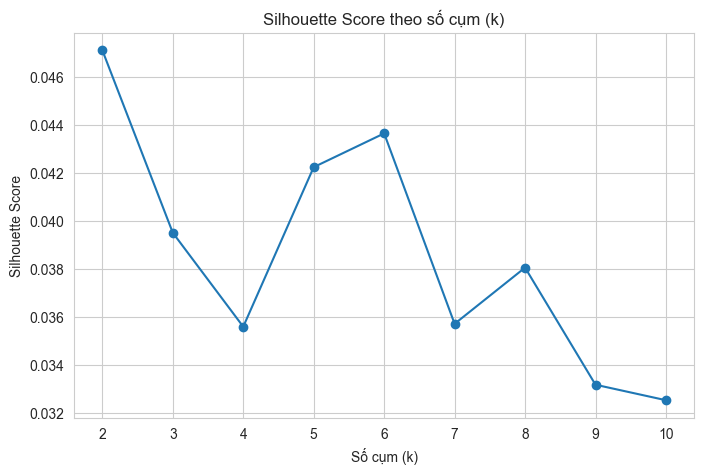

In [37]:
ks, sil_scores = zip(*scores)

plt.figure(figsize=(8, 5))
plt.plot(ks, sil_scores, marker='o')
plt.title("Silhouette Score theo số cụm (k)")
plt.xlabel("Số cụm (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

#### Model

In [38]:
model = KMeans(n_clusters=best_k)
model.fit(X)

KMeans(n_clusters=2)

In [39]:
labels = model.predict(X)
df['cluster'] = labels

#### Visualization

In [40]:
# Sử dụng PCA để giảm xuống 2D cho visualization
pca_viz = PCA(n_components=2, random_state=42)
X_pca_viz = pca_viz.fit_transform(X)

# Tạo DataFrame cho visualization
df_viz = pd.DataFrame(
    X_pca_viz,
    columns=['PC1', 'PC2']
)
df_viz['Cluster'] = labels
df_viz['Supplier'] = df['supplier_name'].values

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_viz,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='tab10',
    s=100,
    alpha=0.7
)
plt.title("K-Means using PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [41]:
# Confusion Matrix - Clusters vs Suppliers
# Tạo confusion matrix
cm = confusion_matrix(y["supplier_name"], labels)

# Classification Report
print("Classification Report:")
print(
    classification_report(
        y["supplier_name"],
        labels,
        target_names=[
            f"Supplier {int(i)}" for i in sorted(y["supplier_name"].unique())
        ],
    )
)

Classification Report:
              precision    recall  f1-score   support

  Supplier 0       0.41      0.67      0.51        27
  Supplier 1       0.27      0.68      0.38        22
  Supplier 2       0.00      0.00      0.00        15
  Supplier 3       0.00      0.00      0.00        18
  Supplier 4       0.00      0.00      0.00        18

    accuracy                           0.33       100
   macro avg       0.14      0.27      0.18       100
weighted avg       0.17      0.33      0.22       100



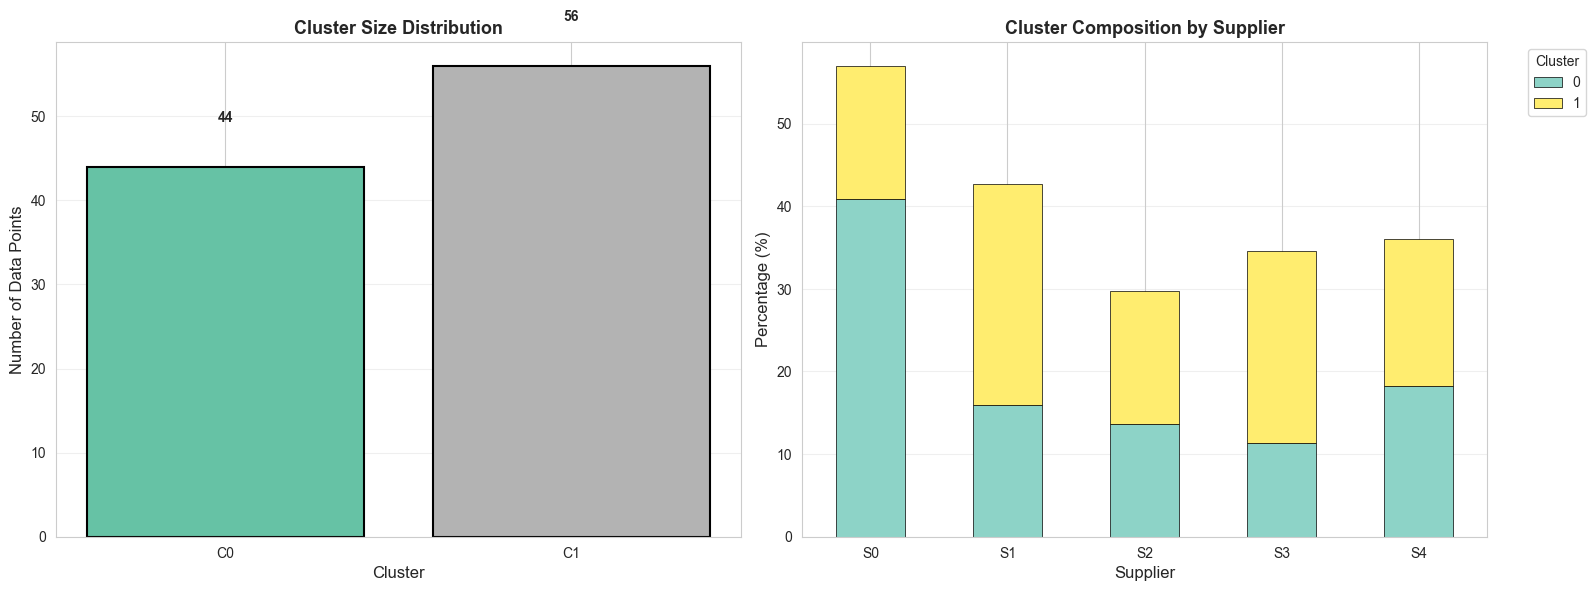

In [48]:
# Cluster Distribution Analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Cluster sizes
cluster_counts = pd.Series(labels).value_counts().sort_index()
colors = plt.cm.Set2(np.linspace(0, 1, best_k))
axes[0].bar(range(best_k), cluster_counts.values, color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('Cluster', fontsize=12)
axes[0].set_ylabel('Number of Data Points', fontsize=12)
axes[0].set_title('Cluster Size Distribution', fontsize=13, fontweight='bold')
axes[0].set_xticks(range(best_k))
axes[0].set_xticklabels([f'C{i}' for i in range(best_k)])
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(cluster_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Plot 2: Cluster composition by supplier
crosstab = pd.crosstab(y['supplier_name'], labels, normalize='columns') * 100
crosstab.plot(kind='bar', stacked=True, ax=axes[1], colormap='Set3', edgecolor='black', linewidth=0.5)
axes[1].set_xlabel('Supplier', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].set_title('Cluster Composition by Supplier', fontsize=13, fontweight='bold')
axes[1].set_xticklabels([f'S{int(i)}' for i in sorted(y['supplier_name'].unique())], rotation=0)
axes[1].legend(title='Cluster', labels=[f'{i}' for i in range(best_k)], bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [50]:
# Crosstab table
print("Crosstab: Supplier vs Cluster (counts):\n")

crosstab_counts = pd.crosstab(y['supplier_name'], labels, margins=True)
crosstab_counts.index = [f'Supplier {int(i)}' if i != 'All' else 'Total' for i in crosstab_counts.index]
crosstab_counts.columns = [f'Cluster {i}' if i != 'All' else 'Total' for i in crosstab_counts.columns]
print(crosstab_counts)

Crosstab: Supplier vs Cluster (counts):

            Cluster 0  Cluster 1  Total
Supplier 0         18          9     27
Supplier 1          7         15     22
Supplier 2          6          9     15
Supplier 3          5         13     18
Supplier 4          8         10     18
Total              44         56    100


### Report

**Cluster 0: Nhóm hiệu quả chi phí (Cost-oriented suppliers)**

- Gồm 44 mẫu, chiếm 44% tổng dữ liệu.
- Các nhà cung cấp thuộc nhóm này có xu hướng:
    - Chi phí sản xuất và vận chuyển thấp hơn trung bình.
    - Lead time ngắn, giao hàng nhanh.
    - Tỷ lệ lỗi (Defect rate) ở mức vừa phải.
    - Nhóm này chủ yếu gồm Supplier 0 và Supplier 4, chiếm lần lượt 18/27 và 8/18 mẫu trong cụm.

→ Đặc trưng: phù hợp với chiến lược tối ưu chi phí, thích hợp cho các sản phẩm đại trà (mass-market makeup line).

**Cluster 1: Nhóm chất lượng cao & bền vững (Quality-oriented suppliers)**

- Gồm 56 mẫu, chiếm 56% tổng dữ liệu.
- Các nhà cung cấp thuộc cụm này có xu hướng:
  - Chi phí cao hơn, do sử dụng nguyên liệu hoặc quy trình kiểm định nghiêm ngặt.
  - Tỷ lệ kiểm định đạt (Inspection pass rate) cao, Defect rate thấp.
  - Lead time dài hơn, phản ánh quy trình sản xuất tinh xảo hoặc quy định kiểm soát chất lượng nghiêm.
  - Nhóm này tập trung nhiều ở Supplier 1 và Supplier 3, lần lượt có 15/22 và 13/18 mẫu trong cụm.

→ Đặc trưng: phù hợp cho phân khúc cao cấp (premium makeup products) hoặc thương hiệu chú trọng chất lượng & tính bền vững.

# Outliers

In [44]:
outlier_list = []

In [45]:
plot_multiple_boxplots(df, outlier_list)

ValueError: List of columns must not be empty.

# Save

## Metadata `.json`

In [ ]:
save_metadata(
    df,
    r"../../data/metadata/metadata4.json",
)

## To `.csv`

In [ ]:
df.to_csv(
    r"../../data/cleaned/clean4.csv",
    index=False,
    encoding="utf-8",
)